### **Exploration Data Analysis and Data Preprocessing**

In [1]:
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv('./archive/aug_train.csv', encoding='utf-8')
df_test = pd.read_csv('./archive/aug_test.csv', encoding='utf-8')
df_test_target = pd.read_csv('./archive/sample_submission.csv')

In [3]:
df_train_comb = df_test.merge(df_test_target, how='inner', on='enrollee_id')
df = pd.concat([df_train, df_train_comb], ignore_index=True)
df_raw = df.copy()

### **Understand features and values**

In [4]:
df['target'].value_counts()

target
0.0    14381
1.0     4777
0.5     2129
Name: count, dtype: int64

In [5]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [6]:
df.apply(pd.unique).to_dict()

{'enrollee_id': array([ 8949, 29725, 11561, ..., 31762,  7873, 12215], dtype=int64),
 'city': array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
        'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
        'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
        'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
        'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
        'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
        'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
        'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
        'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
        'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
        'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
        'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
        'city_123', 'city_7', 'city_72', 'city_106', 'city_

### **Explore and identify preprocessing steps**

In [7]:
# remove `enrollee_id`; no use in modeling
df.drop(columns='enrollee_id', inplace=True)

In [8]:
# missing values
df.isnull().sum()

city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                       0
dtype: int64

**City**

In [9]:
# distribution
city_dict = df['city'].value_counts().to_dict()  # .plot(kind='bar')
city_dict

{'city_103': 4828,
 'city_21': 3020,
 'city_16': 1701,
 'city_114': 1491,
 'city_160': 958,
 'city_136': 646,
 'city_67': 470,
 'city_75': 335,
 'city_102': 334,
 'city_104': 328,
 'city_73': 303,
 'city_100': 296,
 'city_71': 295,
 'city_11': 277,
 'city_61': 221,
 'city_90': 219,
 'city_28': 214,
 'city_23': 198,
 'city_65': 195,
 'city_36': 176,
 'city_173': 166,
 'city_50': 153,
 'city_83': 152,
 'city_116': 144,
 'city_46': 144,
 'city_162': 142,
 'city_138': 129,
 'city_19': 129,
 'city_45': 128,
 'city_64': 126,
 'city_149': 120,
 'city_74': 117,
 'city_97': 111,
 'city_57': 110,
 'city_159': 108,
 'city_128': 106,
 'city_99': 106,
 'city_41': 98,
 'city_10': 97,
 'city_165': 91,
 'city_123': 90,
 'city_105': 90,
 'city_98': 88,
 'city_101': 85,
 'city_40': 80,
 'city_150': 76,
 'city_89': 72,
 'city_24': 69,
 'city_145': 65,
 'city_115': 61,
 'city_13': 58,
 'city_158': 57,
 'city_152': 57,
 'city_134': 56,
 'city_27': 56,
 'city_76': 55,
 'city_142': 55,
 'city_91': 51,
 'city

In [ ]:
city_log = np.log10(df['city'].value_counts())
kmeans_log = KMeans(3).fit_predict(np.reshape(city_log, (-1, 1)))

In [ ]:
pd.Series(kmeans_log, index=city_dict.keys()).to_dict()

In [ ]:
kmeans_log

In [10]:
df['city'].nunique()

123

In [ ]:
quantile = df['city'].value_counts().describe(
    percentiles=np.arange(0, 1, 0.25))[4:]
quantile

In [11]:
n_largest = 7
kmeans = np.array([4] * n_largest + KMeans(4).fit_predict(
    np.reshape(df['city'].value_counts()[n_largest:], (-1, 1))).tolist())
kmeans

d:\Program\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
np.where(np.diff(kmeans) != 0)[0].tolist()

In [12]:
kmeans_cut = [0] + df['city'].value_counts()[np.where(
    np.diff(kmeans) != 0)[0].tolist()].to_list()[::-1] + [
        max(df['city'].value_counts())
    ]
kmeans_cut

C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\683749501.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kmeans_cut = [0] + df['city'].value_counts()[np.where(


[0, 48, 126, 277, 470, 4828]

In [98]:
df['city'] = df_raw['city']

In [99]:
map_index = pd.cut(
    df['city'].value_counts(),
    bins=kmeans_cut,
    labels=[0, 1, 2, 3,
            4],  # ['x-small', 'small', 'medium', 'large', 'x-large'],
    include_lowest=True).to_dict()
df['city'] = df['city'].apply(lambda city: map_index[city])
df['city']

0        4
1        1
2        4
4        2
5        0
        ..
21282    4
21283    4
21284    2
21285    3
21286    3
Name: city, Length: 20024, dtype: int64

In [ ]:
city_bin = pd.Series(kmeans, index=df['city'].value_counts().index).to_dict()
city_bin

In [ ]:
pd.cut(df['city'].value_counts(),
       bins=quantile,
       labels=['small', 'medium', 'large', 'x-large'],
       include_lowest=True)

In [ ]:
map_index = {0: 'x-small', 2: 'small', 3: 'medium', 1: 'large', 4: 'x-large'}
df['city'] = df['city'].apply(lambda city: map_index[city_bin[city]])

**city_development_index**

<Axes: >

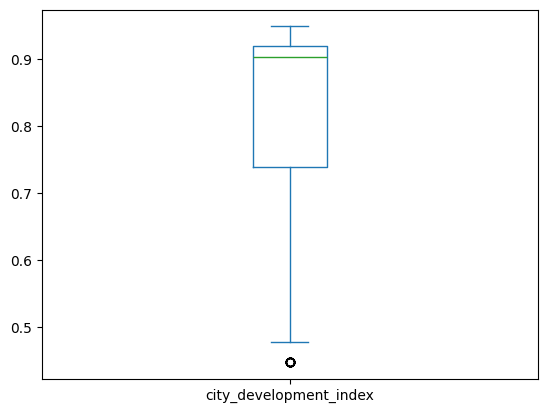

In [14]:
df['city_development_index'].plot(kind='box')

In [15]:
df['city_development_index'].describe()

count    21287.000000
mean         0.828462
std          0.123537
min          0.448000
25%          0.739000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

<Axes: xlabel='city_development_index'>

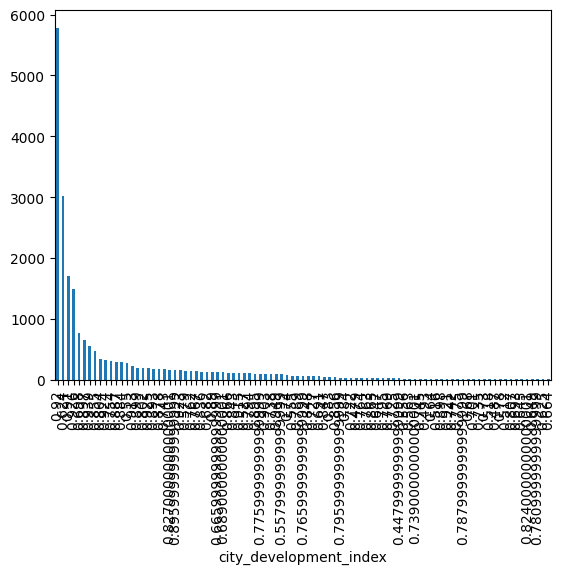

In [16]:
df['city_development_index'].value_counts().plot(kind='bar')

In [17]:
# standardize
df['city_development_index'] = (
    df['city_development_index'] -
    df['city_development_index'].mean()) / df['city_development_index'].std()
df['city_development_index']

0        0.740983
1       -0.424664
2       -1.655069
3       -0.319432
4       -0.497517
           ...   
21282    0.740983
21283    0.554803
21284    0.473856
21285   -0.198010
21286   -0.198010
Name: city_development_index, Length: 21287, dtype: float64

In [18]:
df['city_development_index'].describe()

count    2.128700e+04
mean     3.795213e-16
std      1.000000e+00
min     -3.079749e+00
25%     -7.241703e-01
50%      6.033720e-01
75%      7.409831e-01
max      9.757315e-01
Name: city_development_index, dtype: float64

**gender**

In [19]:
df['gender'].value_counts(dropna=False, normalize=True)

gender
Male      0.689670
NaN       0.235637
Female    0.064593
Other     0.010100
Name: proportion, dtype: float64

In [20]:
df[df['gender'].isna()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,x-large,-1.655069,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,small,-0.319432,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
5,x-small,-0.521801,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
9,x-large,0.740983,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0
10,x-large,-1.655069,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21266,large,0.894784,NaN,No relevent experience,NaN,High School,NaN,2,NaN,NaN,never,44,0.5
21268,small,-1.056056,NaN,Has relevent experience,no_enrollment,Masters,STEM,15,50-99,Pvt Ltd,>4,157,0.5
21272,large,-0.602749,NaN,Has relevent experience,no_enrollment,High School,NaN,>20,50-99,Pvt Ltd,2,31,0.5
21277,small,-1.056056,NaN,No relevent experience,Full time course,High School,NaN,8,NaN,NaN,never,55,0.5


In [21]:
# add NA to others? check others distribution on `enrolled_university`, `education_level`, `major_discipline`
group_other = df[df['gender'] == 'Other'].groupby(
    ['enrolled_university', 'education_level', 'major_discipline']).size()
group_other

enrolled_university  education_level  major_discipline
Full time course     Graduate         Arts                 2
                                      Humanities           2
                                      No Major             1
                                      Other                2
                                      STEM                23
                     Masters          STEM                 7
                     Phd              Other                1
Part time course     Graduate         Arts                 1
                                      Humanities           1
                                      STEM                 9
                     Masters          STEM                 1
no_enrollment        Graduate         Arts                 4
                                      Business Degree      3
                                      Humanities           4
                                      No Major             2
                              

<Axes: xlabel='enrolled_university,education_level,major_discipline'>

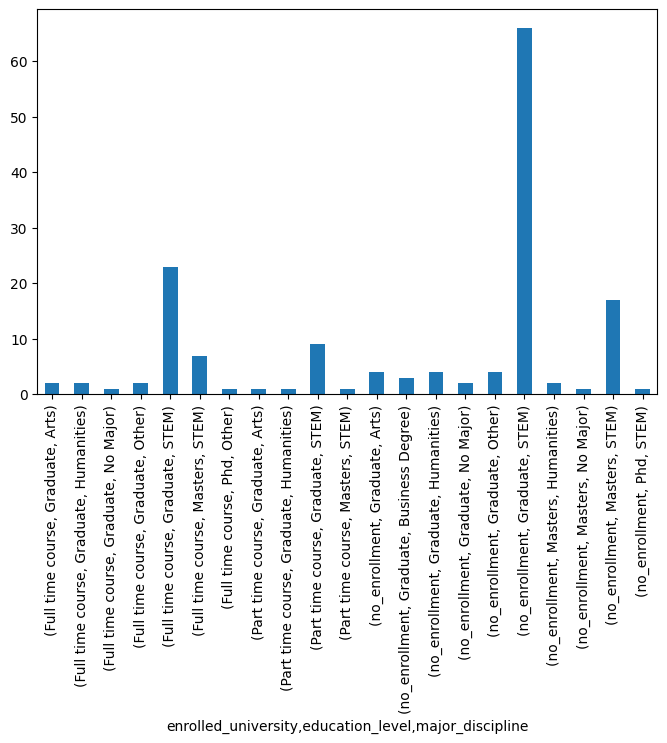

In [22]:
figure(figsize=(8, 5))
group_other.plot(kind='bar')

In [23]:
group_na = df[df['gender'].isna()].groupby(
    ['enrolled_university', 'education_level', 'major_discipline']).size()
group_na

enrolled_university  education_level  major_discipline
Full time course     Graduate         Arts                   3
                                      Business Degree        6
                                      Humanities             3
                                      No Major               3
                                      Other                 17
                                      STEM                 754
                     Masters          Business Degree        2
                                      Humanities             3
                                      No Major               2
                                      Other                  3
                                      STEM                 197
                     Phd              Other                  1
                                      STEM                  10
Part time course     Graduate         Arts                   1
                                      Business Degree        3


<Axes: xlabel='enrolled_university,education_level,major_discipline'>

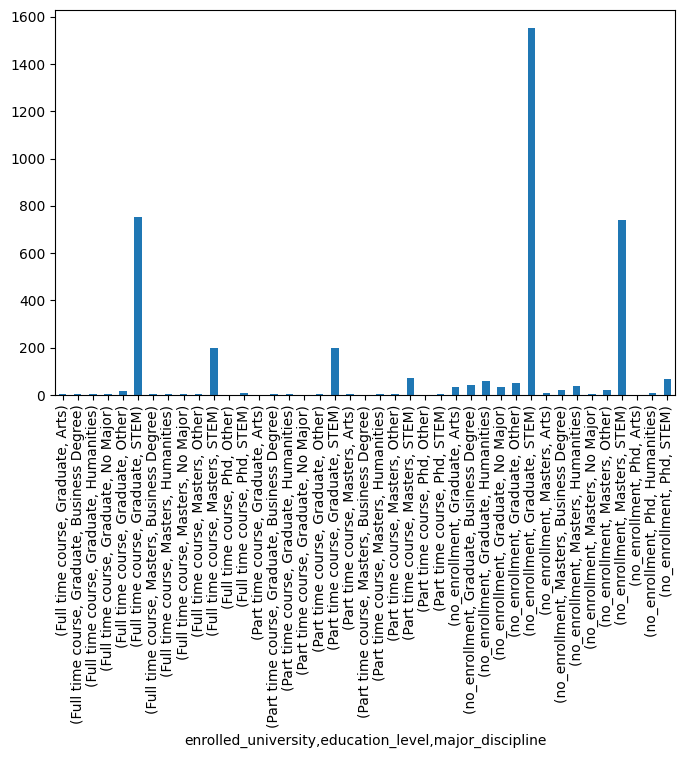

In [24]:
figure(figsize=(8, 5))
group_na.plot(kind='bar')

In [25]:
df[(df['gender'].isna()) & df['major_discipline'].isna()].isna().sum(axis=0)

city                        0
city_development_index      0
gender                    930
relevent_experience         0
enrolled_university        84
education_level           228
major_discipline          930
experience                 15
company_size              623
company_type              610
last_new_job              107
training_hours              0
target                      0
dtype: int64

In [26]:
df[(df['gender'].isna()) & df['company_type'].isna()].isna().sum(axis=0)

city                         0
city_development_index       0
gender                    1901
relevent_experience          0
enrolled_university        121
education_level            153
major_discipline           610
experience                  28
company_size              1646
company_type              1901
last_new_job               215
training_hours               0
target                       0
dtype: int64

In [27]:
df.drop(index=df[(df['gender'].isna())
                 & df['major_discipline'].isna()].index,
        inplace=True)

In [28]:
df['gender'].fillna('Other', inplace=True)
df['gender'].isna().sum()

0

<Axes: xlabel='gender'>

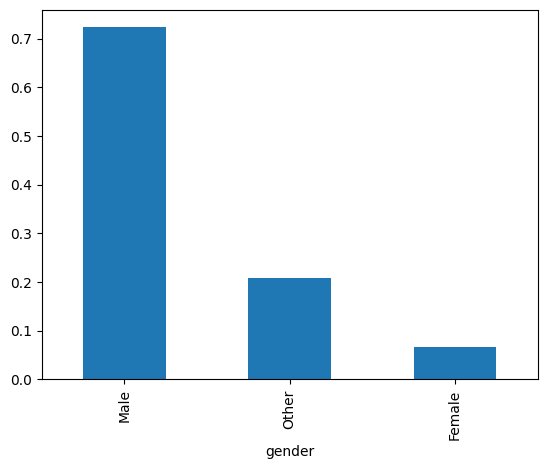

In [62]:
df['gender'].value_counts(dropna=False, normalize=True).plot(kind='bar')

In [92]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
gender_encoding = dict(zip(le.classes_, le.transform(le.classes_)))
gender_encoding

{'Female': 0, 'Male': 1, 'Other': 2}

**relevent_experience**

In [30]:
# convert to binary
df['relevent_experience'].value_counts(dropna=False)

relevent_experience
Has relevent experience    15021
No relevent experience      5336
Name: count, dtype: int64

In [31]:
le = LabelEncoder()

In [32]:
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])

In [33]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Has relevent experience': 0, 'No relevent experience': 1}


**enrolled_university**

In [34]:
df['enrolled_university'].value_counts(dropna=False, normalize=True)

enrolled_university
no_enrollment       0.730412
Full time course    0.190303
Part time course    0.062927
NaN                 0.016358
Name: proportion, dtype: float64

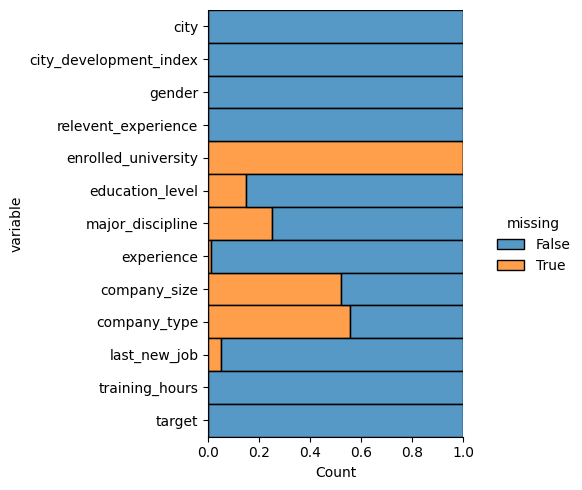

In [35]:
# impute NAN as 'unknown' or remove, or add to other columns
sns.displot(
    df[df['enrolled_university'].isna()].isna().melt(value_name='missing'),
    y="variable",
    hue="missing",
    multiple="fill")

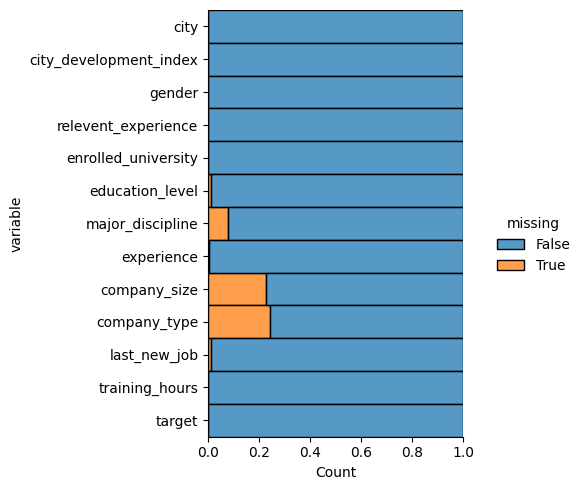

In [48]:
# other
sns.displot(df[df['enrolled_university'] == 'no_enrollment'].isna().melt(
    value_name='missing'),
            y="variable",
            hue="missing",
            multiple="fill")

In [45]:
df.dropna(subset=['enrolled_university'], inplace=True)
df['enrolled_university'].value_counts(dropna=False, normalize=True)

enrolled_university
no_enrollment       0.742559
Full time course    0.193468
Part time course    0.063973
Name: proportion, dtype: float64

In [91]:
le = LabelEncoder()
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
enrolled_university_encoding = dict(zip(le.classes_,
                                        le.transform(le.classes_)))
enrolled_university_encoding

{'Full time course': 0, 'Part time course': 1, 'no_enrollment': 2}

C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\2595293947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, stat='percent', palette='muted')
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\2595293947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, stat='percent', palette='muted')
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\2595293947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, stat='percent', palette='muted')
C:\Users\Junxiao\AppData\Local\Tem

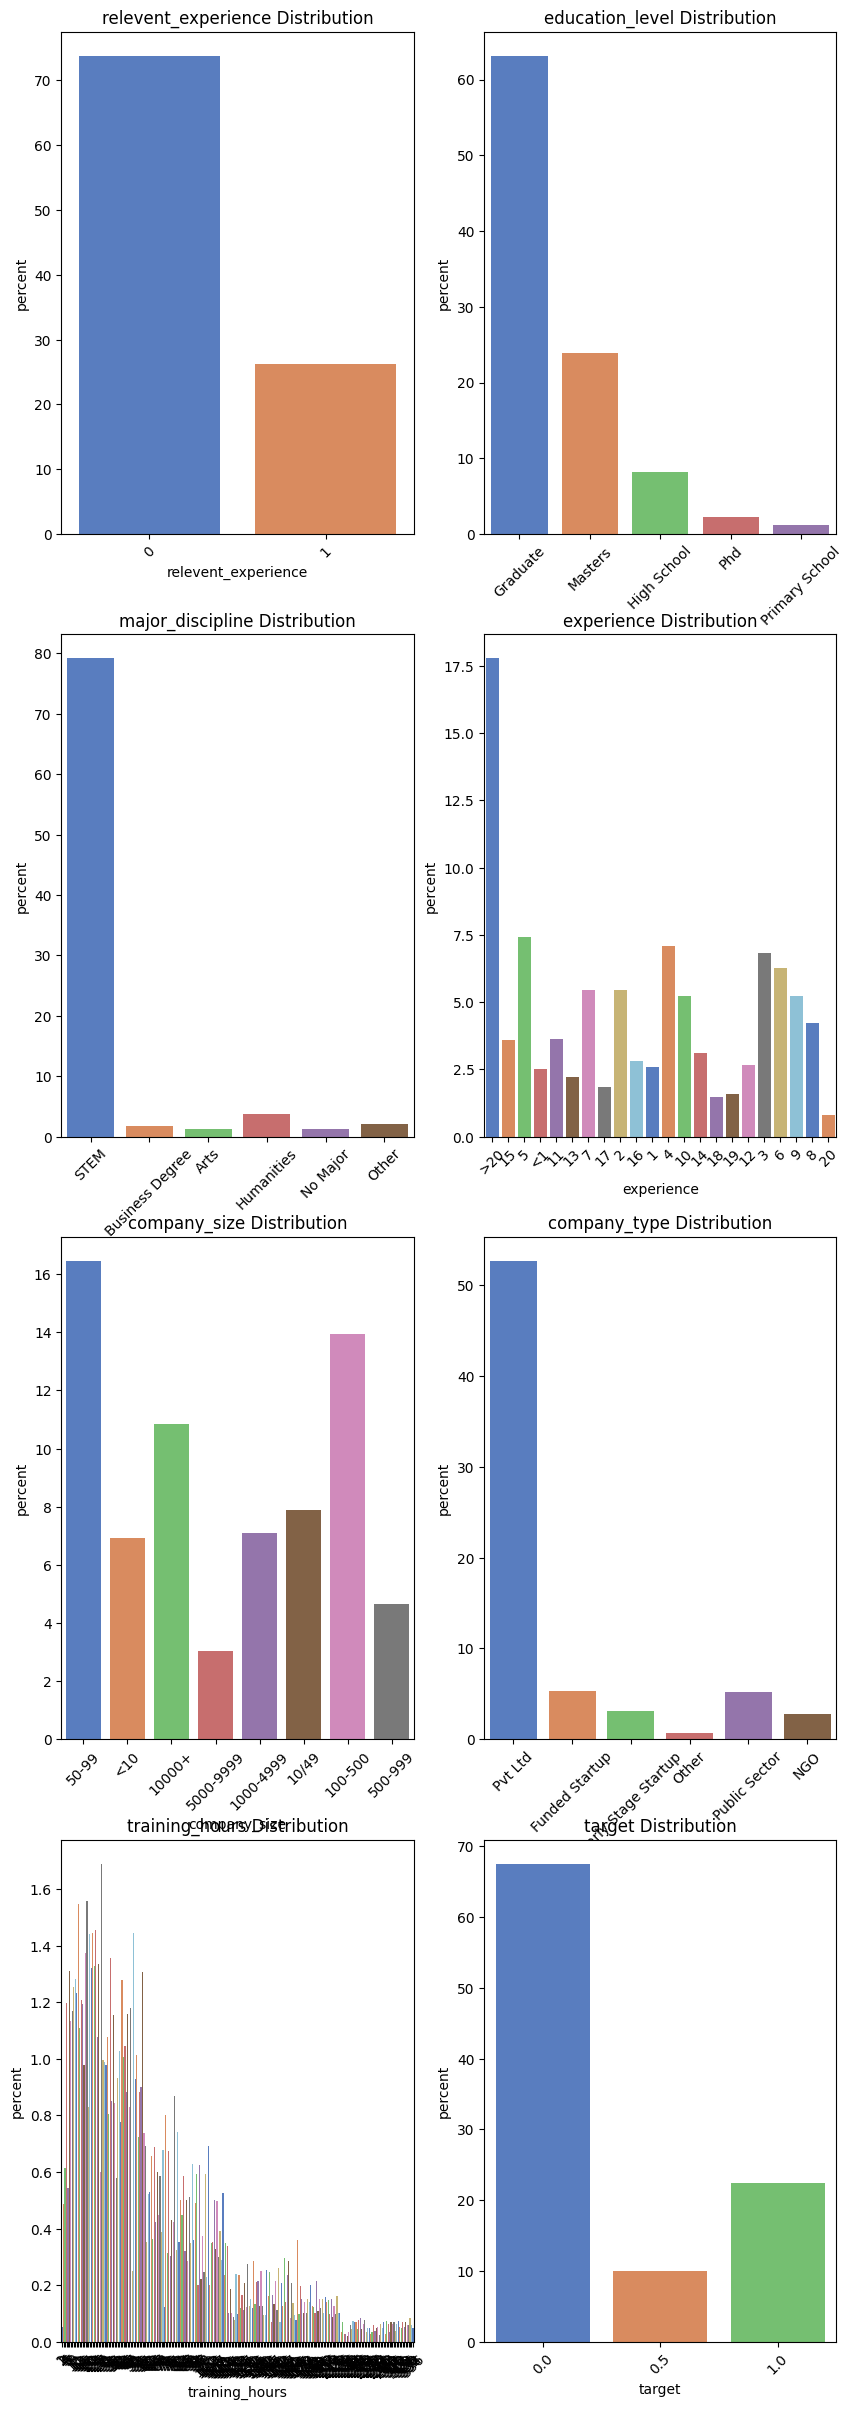

In [37]:
plt.figure(figsize=(10, 30))
columns = [
    'relevent_experience', 'education_level', 'major_discipline', 'experience',
    'company_size', 'company_type', 'training_hours', 'target'
]

for n, col_name in enumerate(columns):
    plt.subplot(4, 2, n + 1)
    sns.countplot(x=col_name, data=df, stat='percent', palette='muted')
    plt.title(f"{col_name} Distribution")
    plt.xticks(rotation=45)

plt.show()

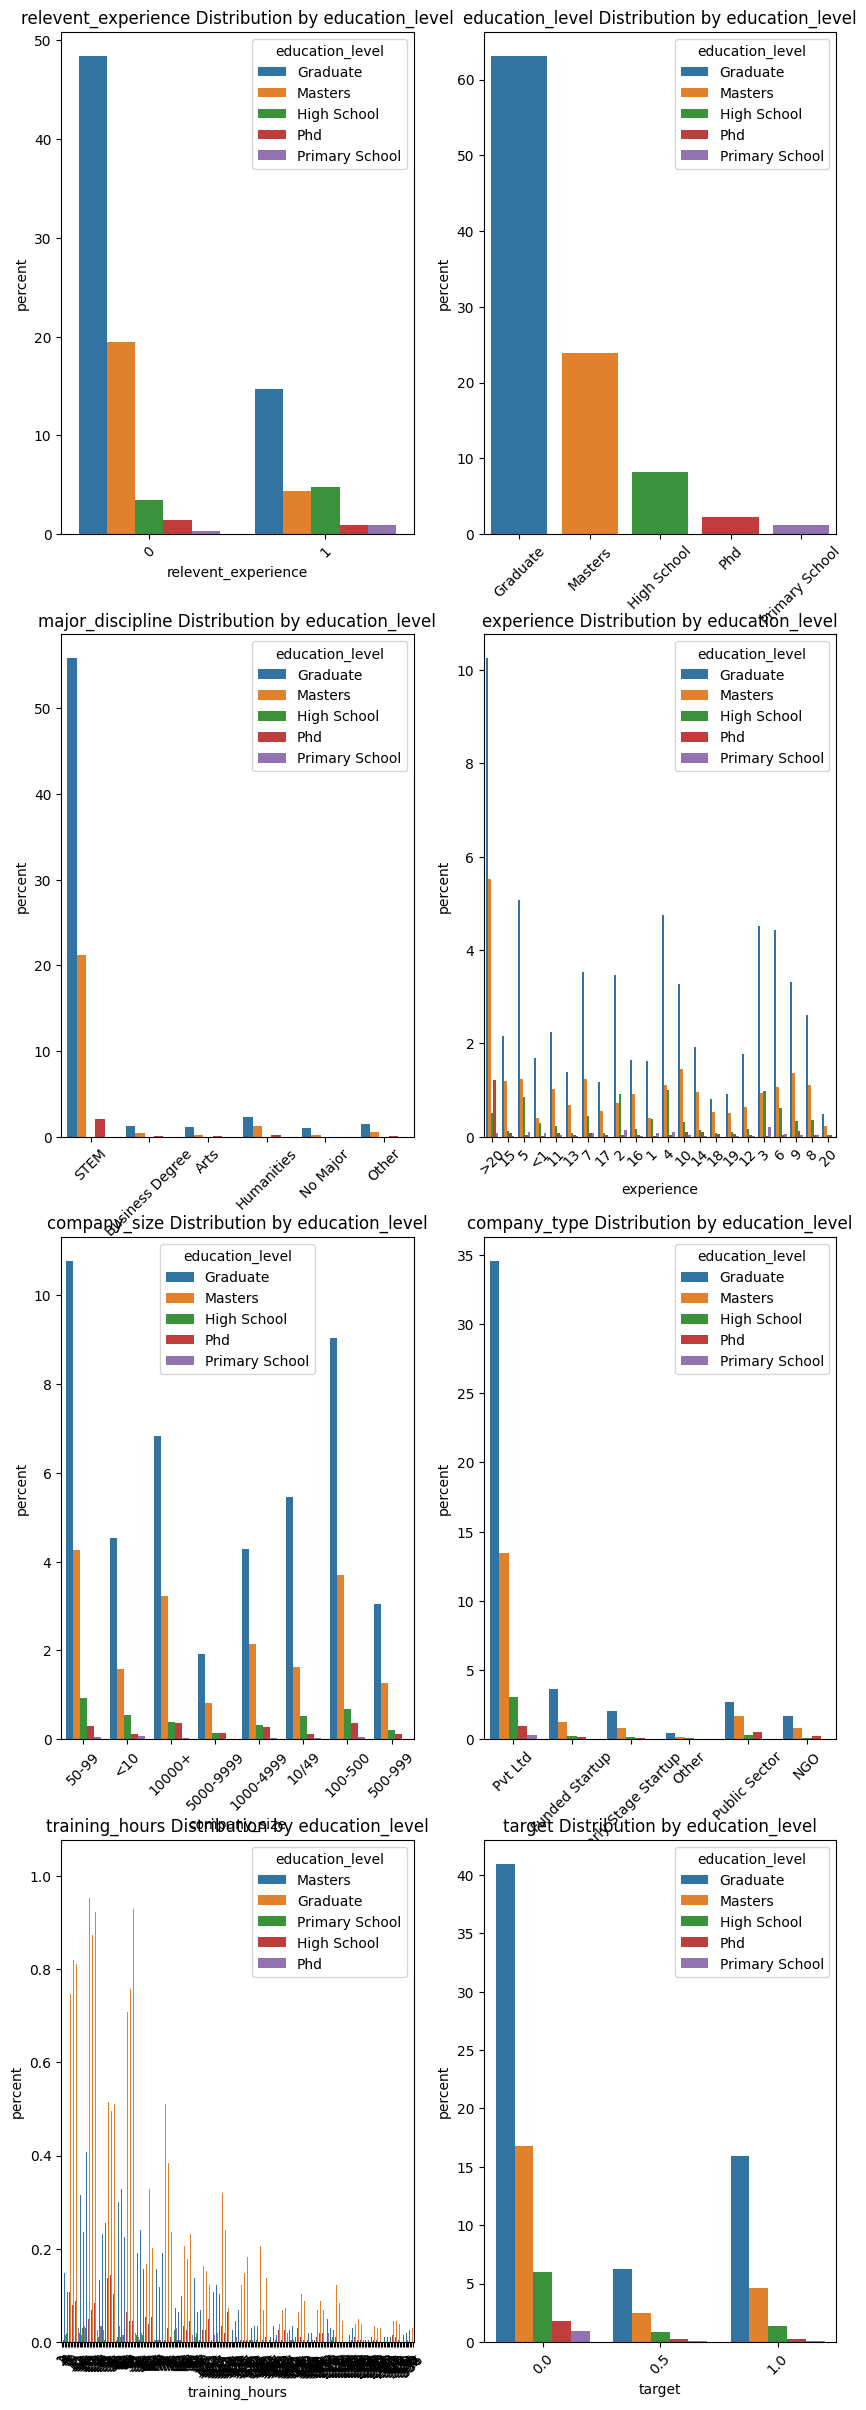

In [38]:
plt.figure(figsize=(10, 30))
columns = [
    'relevent_experience', 'education_level', 'major_discipline', 'experience',
    'company_size', 'company_type', 'training_hours', 'target'
]

for n, col_name in enumerate(columns):
    plt.subplot(4, 2, n + 1)
    sns.countplot(x=col_name, data=df, stat='percent', hue='education_level')
    plt.title(f"{col_name} Distribution by education_level")
    plt.xticks(rotation=45)

plt.show()

**education_level**

In [51]:
df['education_level'].value_counts(dropna=False, normalize=True)

education_level
Graduate          0.632591
Masters           0.239612
High School       0.081652
Phd               0.023022
NaN               0.011736
Primary School    0.011386
Name: proportion, dtype: float64

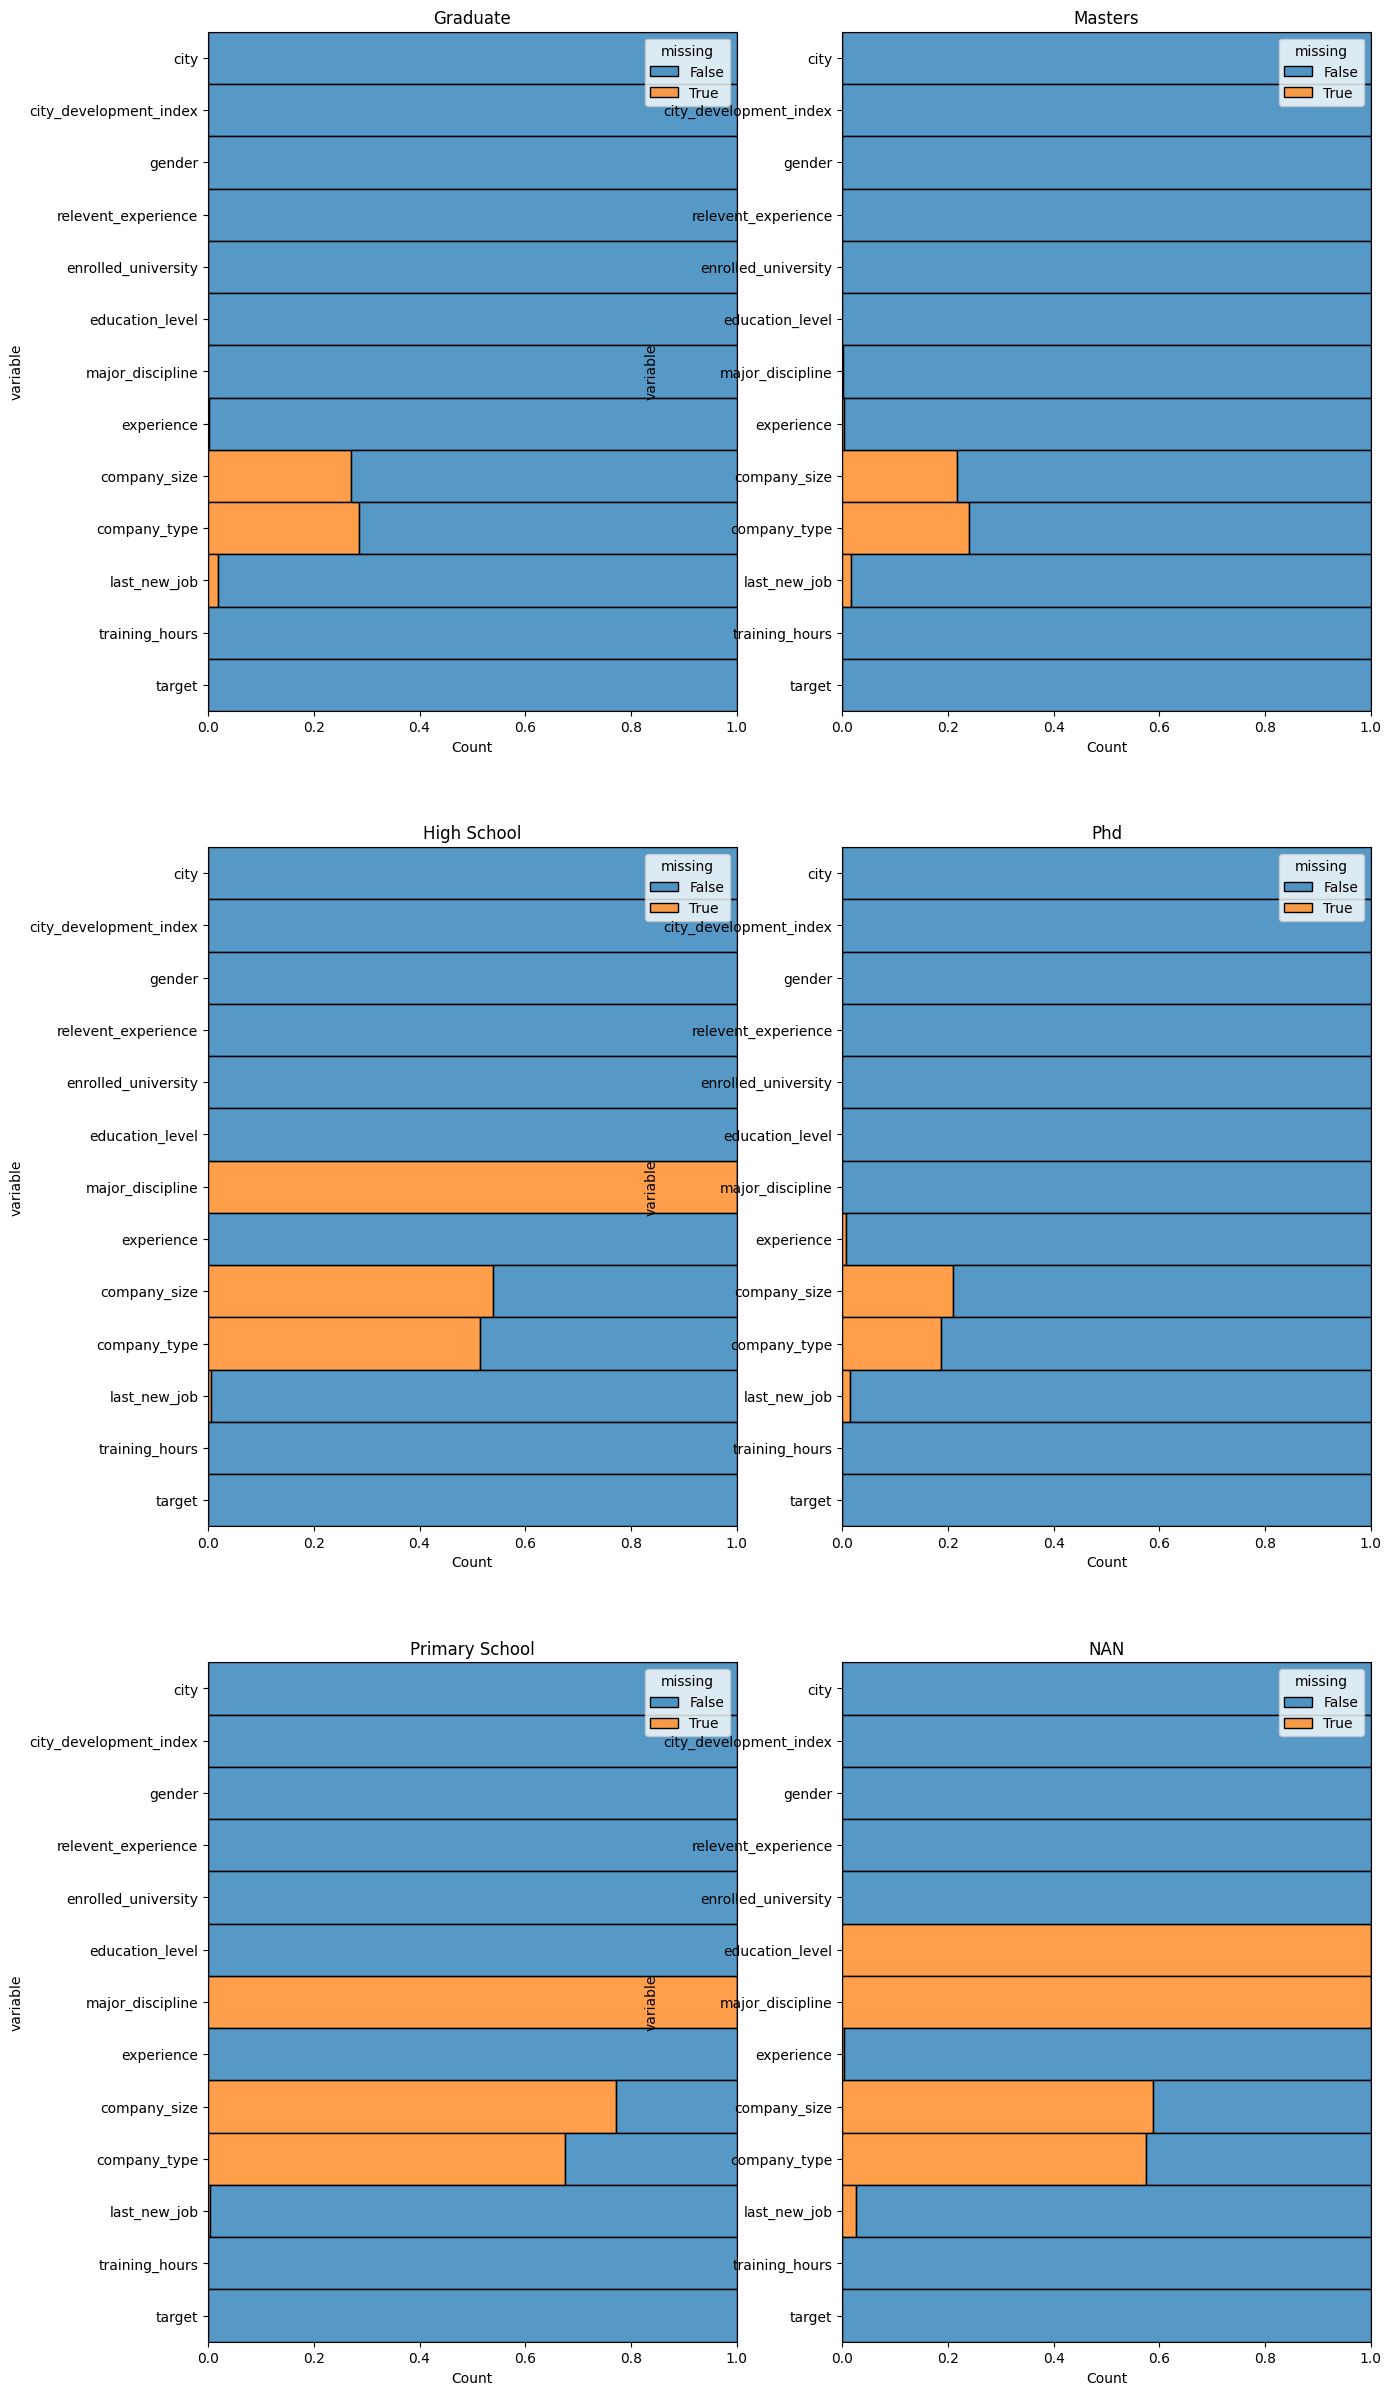

In [59]:
fig, axes = plt.subplots(3, 2, figsize=(15, 30))
keys = ['Graduate', 'Masters', 'High School', 'Phd', 'Primary School']

for i, ax in enumerate(axes.ravel()):
    if i < len(keys):
        key = keys[i]
        sns.histplot(
            df[df['education_level'] == key].isna().melt(value_name='missing'),
            y="variable",
            hue="missing",
            multiple="fill",
            ax=ax)
        ax.set_title(f"{key}")
    else:
        sns.histplot(
            df[df['education_level'].isna()].isna().melt(value_name='missing'),
            y="variable",
            hue="missing",
            multiple="fill",
            ax=ax)
        ax.set_title("NAN")

plt.show()

In [60]:
df['education_level'].fillna('Unknown', inplace=True)
df['education_level'].value_counts(dropna=False, normalize=True)

education_level
Graduate          0.632591
Masters           0.239612
High School       0.081652
Phd               0.023022
Unknown           0.011736
Primary School    0.011386
Name: proportion, dtype: float64

In [61]:
le = LabelEncoder()
df['education_level'] = le.fit_transform(df['education_level'])
education_level_encoding = dict(zip(le.classes_, le.transform(le.classes_)))
education_level_encoding

{'Graduate': 0, 'High School': 1, 'Masters': 2, 'Phd': 3, 'Primary School': 4, 'Unknown': 5}


**major_discipline**

In [63]:
df['major_discipline'].value_counts(dropna=False, normalize=True)

major_discipline
STEM               0.793348
NaN                0.105423
Humanities         0.036956
Other              0.020825
Business Degree    0.018078
Arts               0.013384
No Major           0.011986
Name: proportion, dtype: float64

In [64]:
df['major_discipline'].value_counts(dropna=False, normalize=True).keys()

Index(['STEM', nan, 'Humanities', 'Other', 'Business Degree', 'Arts',
       'No Major'],
      dtype='object', name='major_discipline')

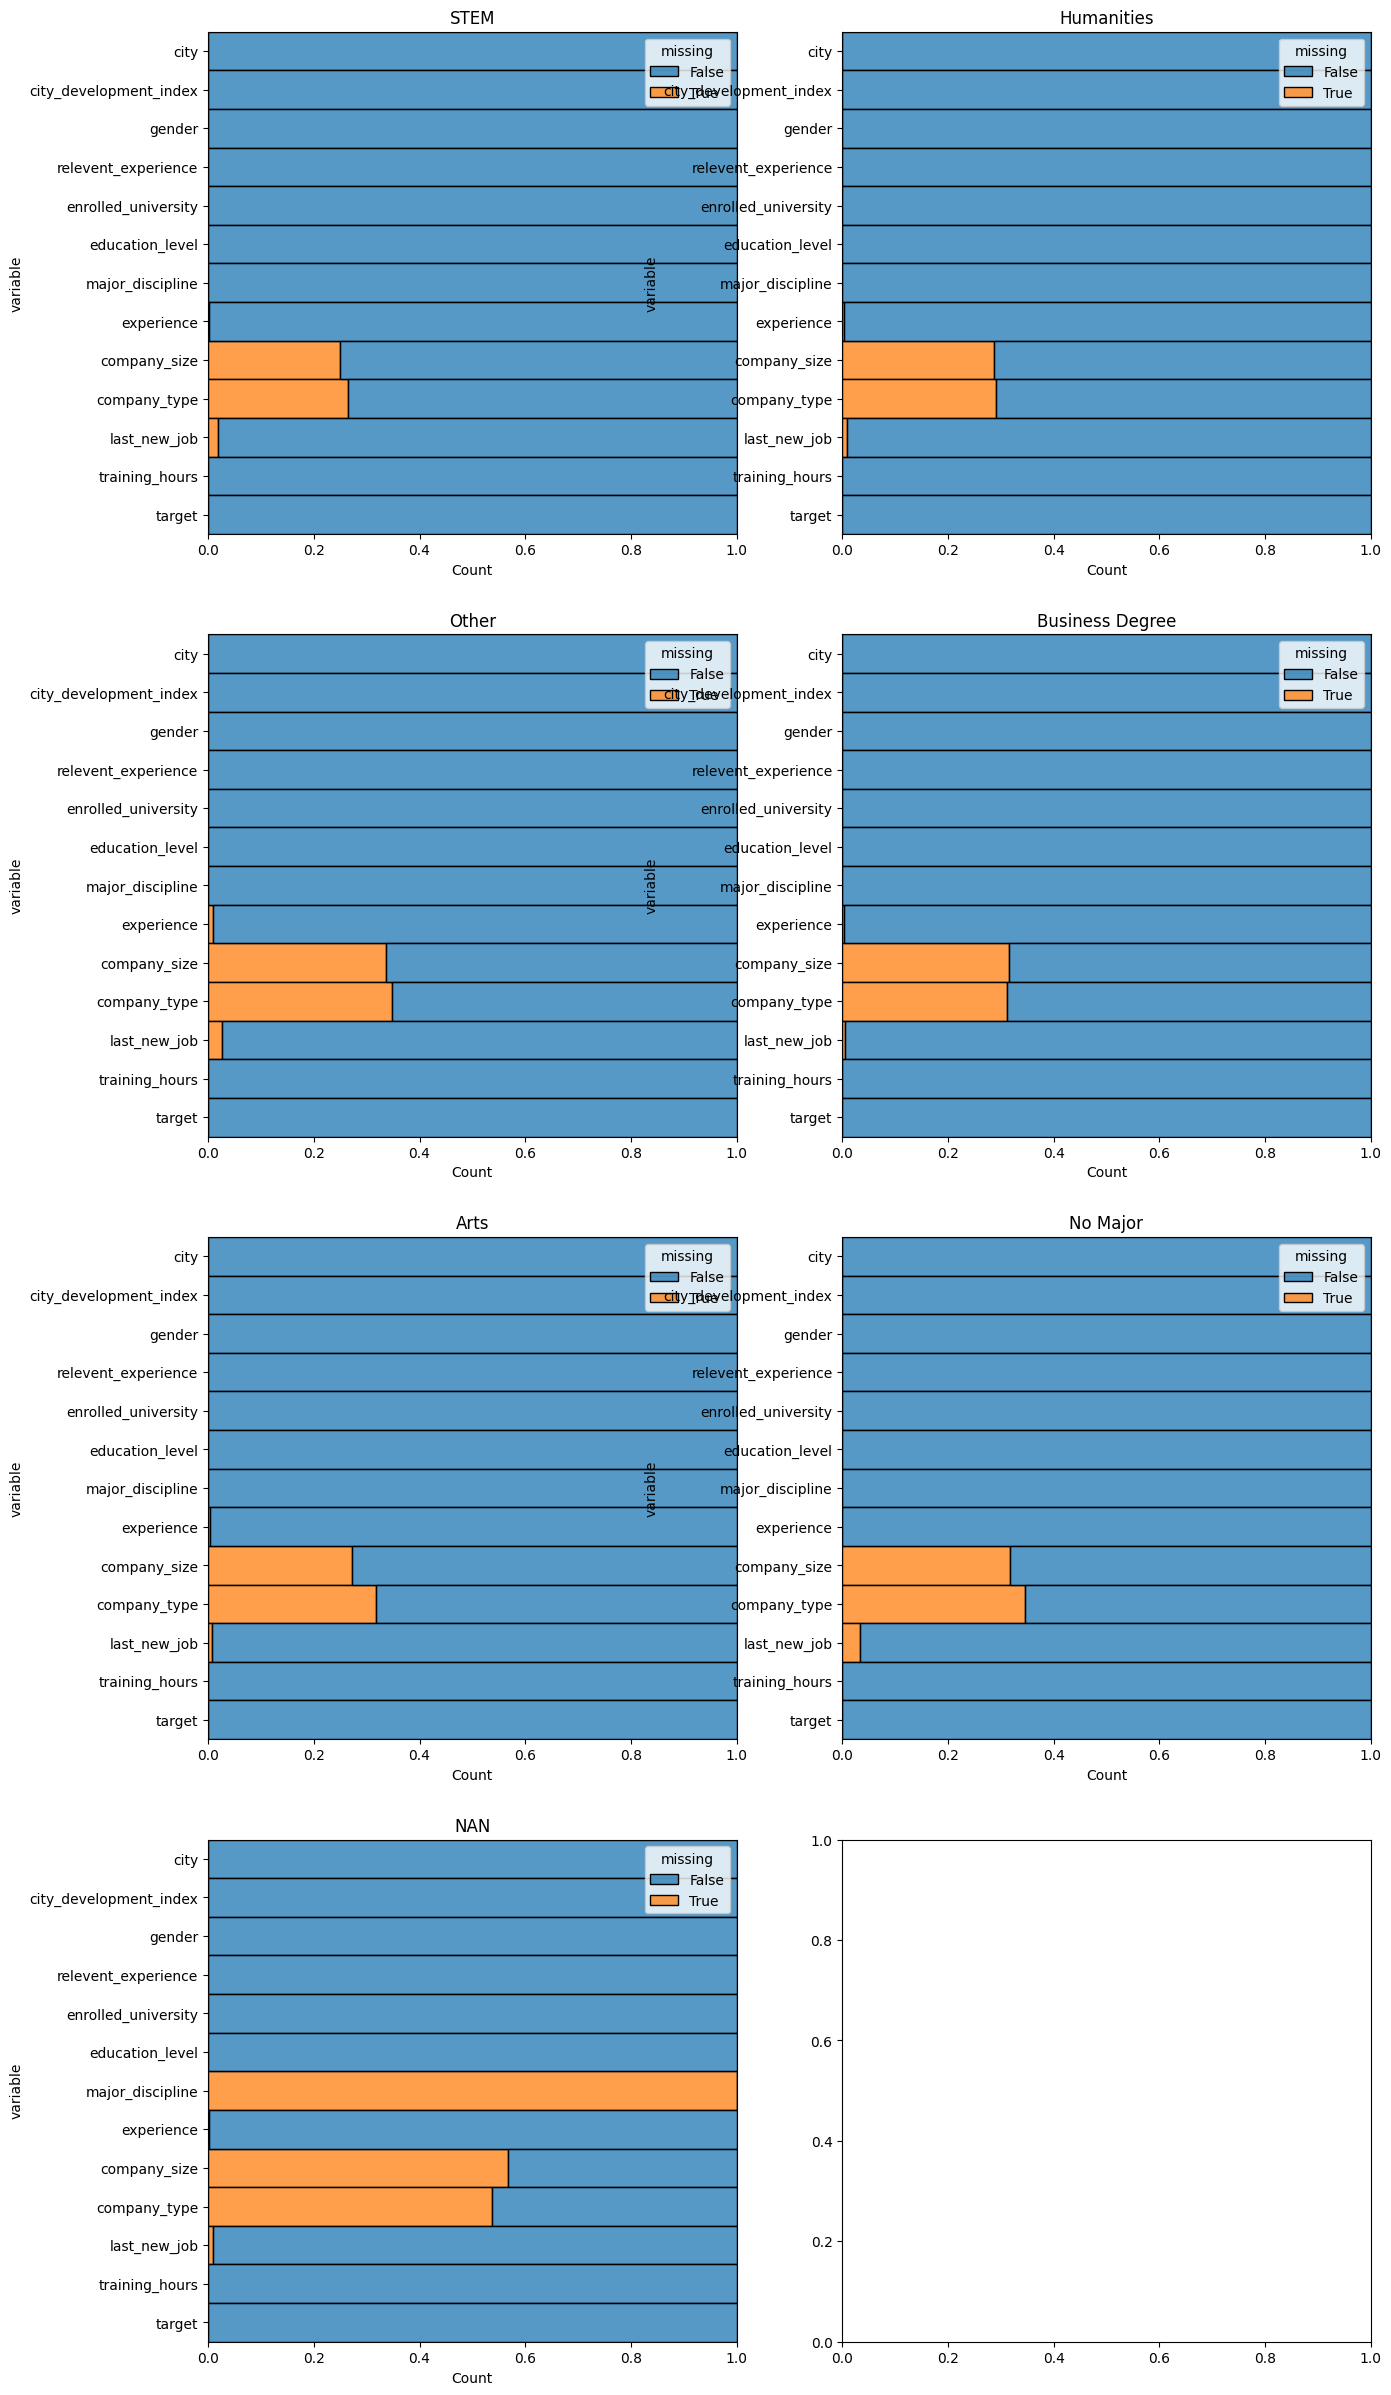

In [67]:
fig, axes = plt.subplots(4, 2, figsize=(15, 30))
keys = ['STEM', 'Humanities', 'Other', 'Business Degree', 'Arts', 'No Major']

for i, ax in enumerate(axes.ravel()):
    if i < len(keys):
        key = keys[i]
        sns.histplot(df[df['major_discipline'] == key].isna().melt(
            value_name='missing'),
                     y="variable",
                     hue="missing",
                     multiple="fill",
                     ax=ax)
        ax.set_title(f"{key}")
    else:
        sns.histplot(df[df['major_discipline'].isna()].isna().melt(
            value_name='missing'),
                     y="variable",
                     hue="missing",
                     multiple="fill",
                     ax=ax)
        ax.set_title("NAN")
        break

plt.show()

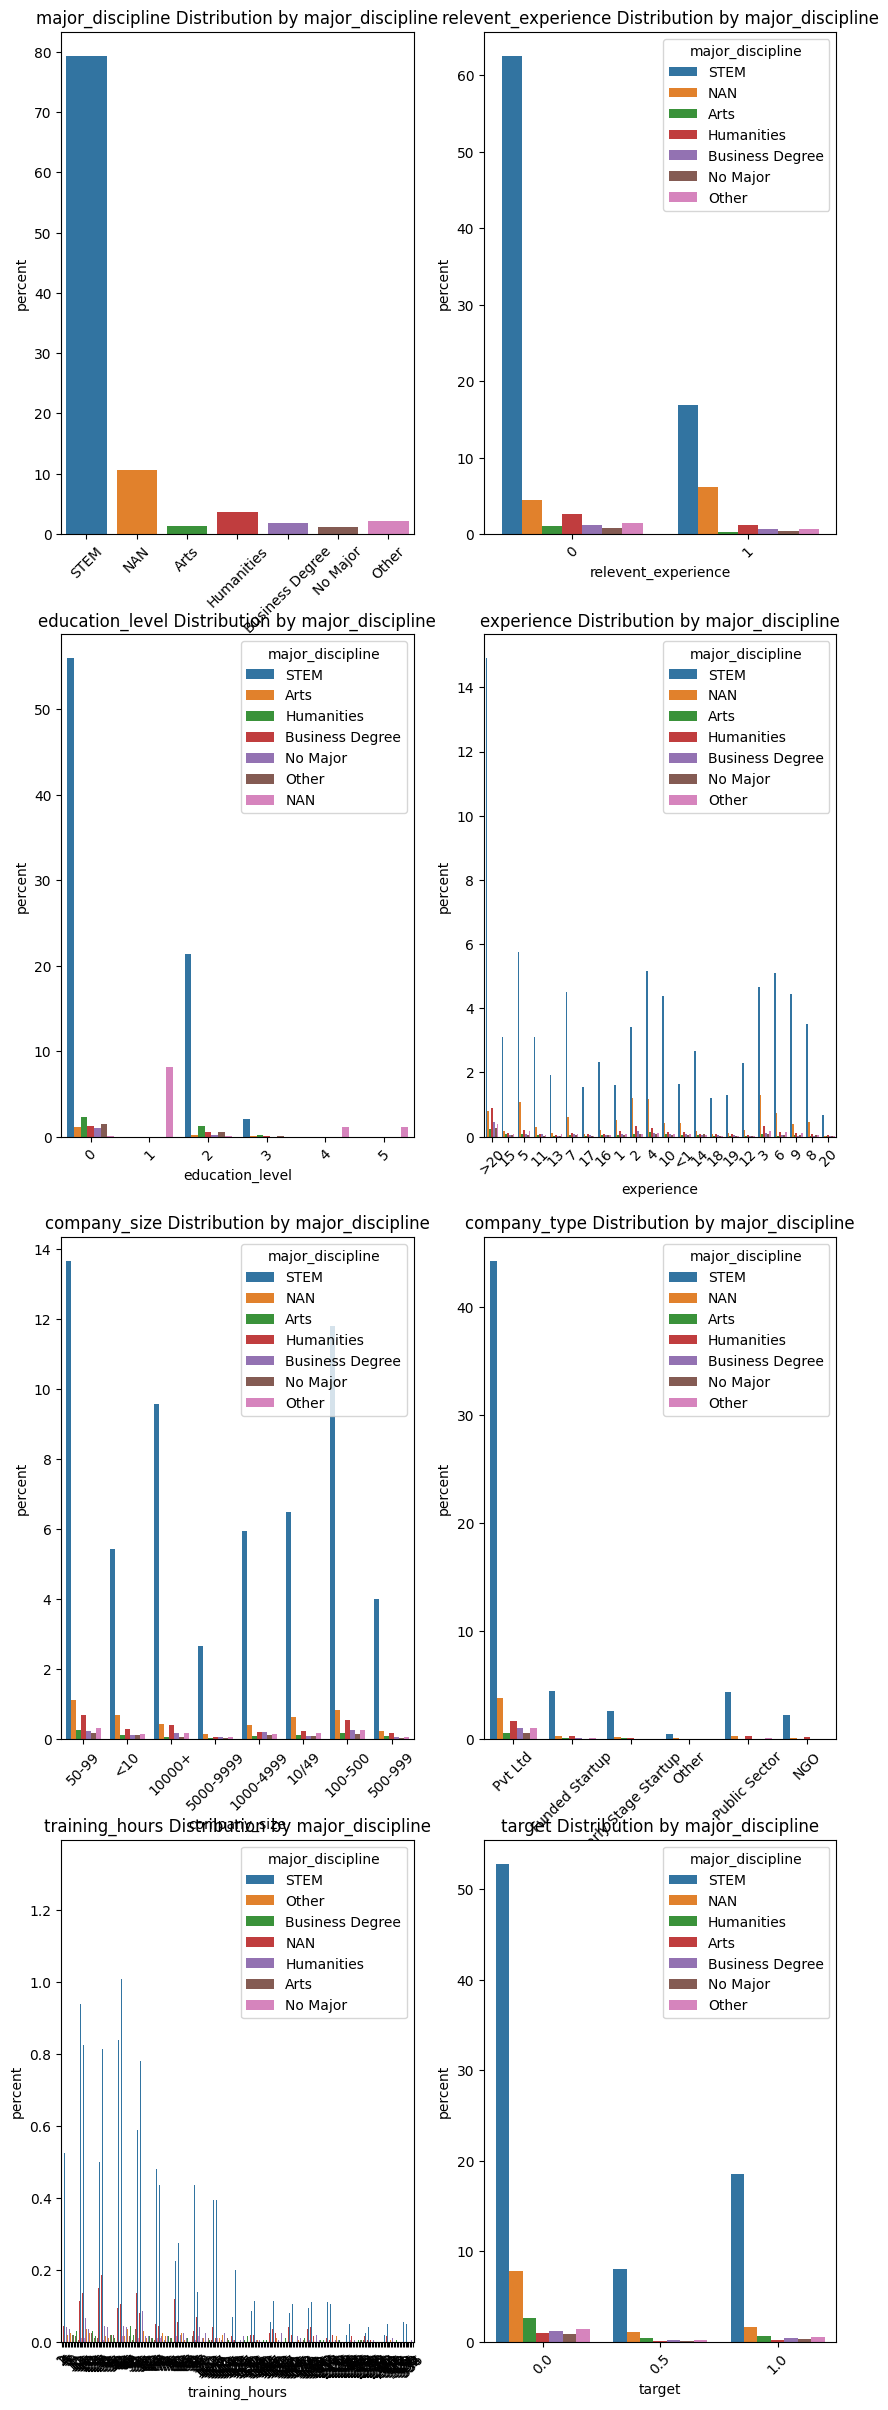

In [70]:
df_temp = df.copy()
df_temp['major_discipline'].fillna('NAN', inplace=True)
plt.figure(figsize=(10, 30))
columns = [
    'major_discipline', 'relevent_experience', 'education_level', 'experience',
    'company_size', 'company_type', 'training_hours', 'target'
]

for n, col_name in enumerate(columns):
    plt.subplot(4, 2, n + 1)
    sns.countplot(x=col_name,
                  data=df_temp,
                  stat='percent',
                  hue='major_discipline')
    plt.title(f"{col_name} Distribution by major_discipline")
    plt.xticks(rotation=45)

plt.show()

C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\3126935573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\3126935573.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\3126935573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\3126935573.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

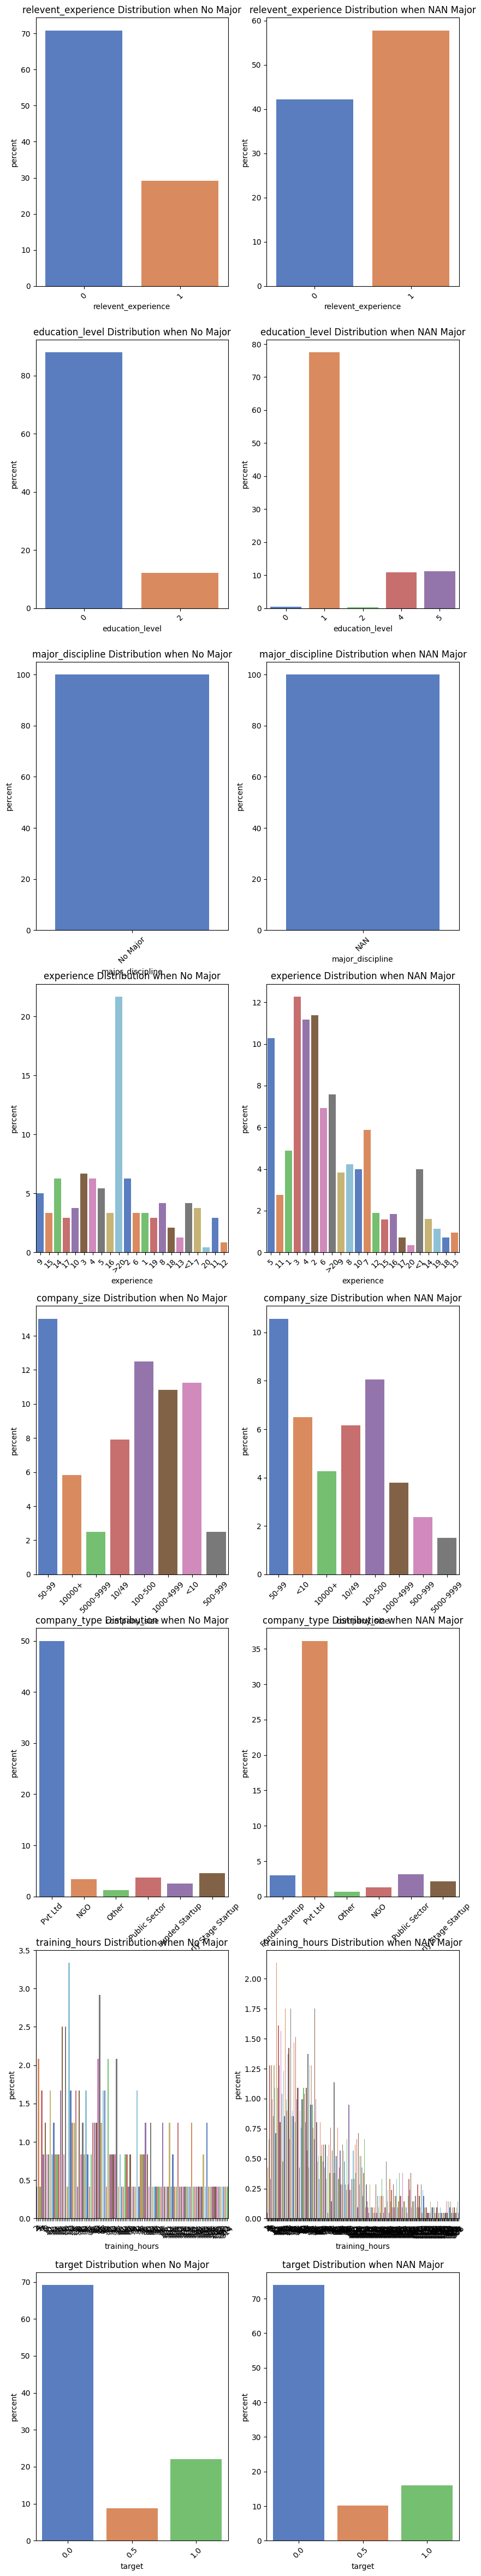

In [80]:
plt.figure(figsize=(10, 60))
columns = [
    'relevent_experience', 'education_level', 'major_discipline', 'experience',
    'company_size', 'company_type', 'training_hours', 'target'
]

for n, col_name in enumerate(columns):
    plt.subplot(8, 2, 2 * n + 1)
    sns.countplot(x=col_name,
                  data=df_temp[df_temp['major_discipline'] == 'No Major'],
                  stat='percent',
                  palette='muted')
    plt.title(f"{col_name} Distribution when No Major")
    plt.xticks(rotation=45)

    plt.subplot(8, 2, 2 * n + 2)
    sns.countplot(x=col_name,
                  data=df_temp[df_temp['major_discipline'] == 'NAN'],
                  stat='percent',
                  palette='muted')
    plt.title(f"{col_name} Distribution when NAN Major")
    plt.xticks(rotation=45)

plt.show()

In [68]:
group_na = df[df['major_discipline'].isna()].groupby(
    ['enrolled_university', 'education_level']).size()
group_na

enrolled_university  education_level
Full time course     0                    2
                     1                  714
                     2                    1
                     4                   20
                     5                   36
Part time course     1                  138
                     4                    7
                     5                   13
no_enrollment        0                    6
                     1                  783
                     2                    4
                     4                  201
                     5                  186
dtype: int64

In [81]:
group_no = df[df['major_discipline'] == 'No Major'].groupby(
    ['enrolled_university', 'education_level']).size()
group_no

enrolled_university  education_level
Full time course     0                   17
                     2                    3
Part time course     0                   11
                     2                    2
no_enrollment        0                  183
                     2                   24
dtype: int64

In [82]:
df['major_discipline'].fillna('Missing', inplace=True)

In [86]:
le = LabelEncoder()
df['major_discipline'] = le.fit_transform(df['major_discipline'])
major_discipline_encoding = dict(zip(le.classes_, le.transform(le.classes_)))
major_discipline_encoding

{'Arts': 0,
 'Business Degree': 1,
 'Humanities': 2,
 'Missing': 3,
 'No Major': 4,
 'Other': 5,
 'STEM': 6}

**experience**

In [103]:
df['experience'].unique()

array(['>20', '15', '5', '11', '13', '7', '17', '16', '1', '2', '4', '10',
       '<1', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [108]:
df['experience'].value_counts(dropna=False, normalize=True)

experience
>20    0.179385
5      0.074411
4      0.070565
3      0.067269
6      0.062175
7      0.054834
2      0.053686
10     0.052237
9      0.052038
8      0.042149
11     0.036606
15     0.036256
14     0.031312
16     0.028266
12     0.026518
1      0.025469
<1     0.024670
13     0.022024
17     0.018428
19     0.016181
18     0.014882
20     0.008090
NaN    0.002547
Name: proportion, dtype: float64

C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\2524353775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\2524353775.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\2524353775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\2524353775.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

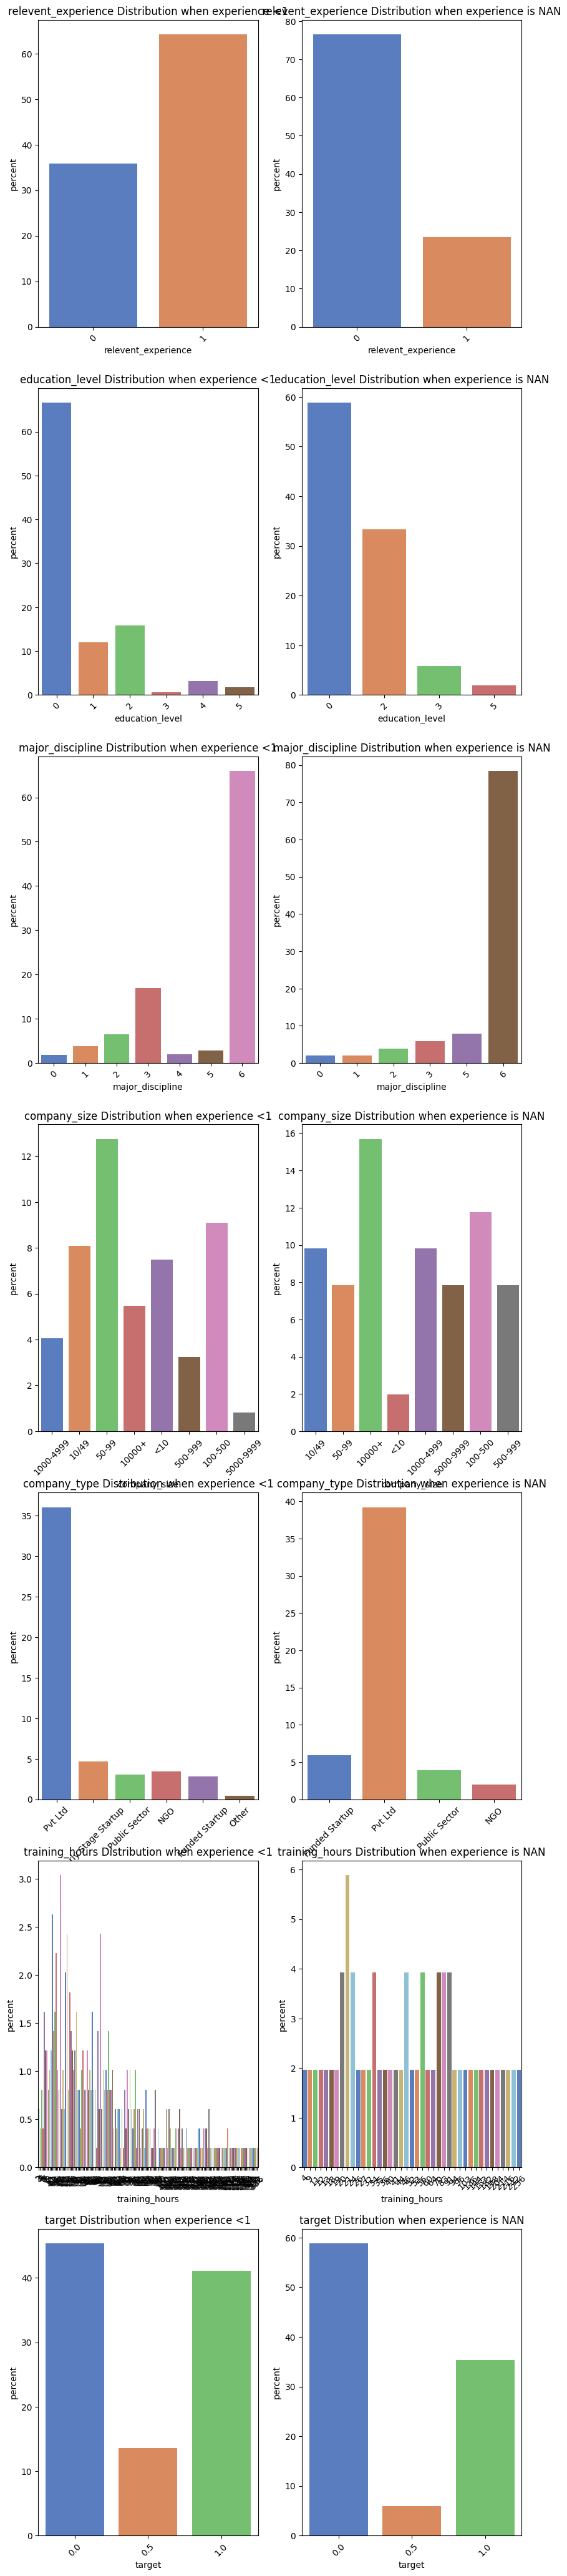

In [107]:
df_temp = df.copy()
df_temp['experience'].fillna('NAN', inplace=True)
plt.figure(figsize=(10, 60))
columns = [
    'relevent_experience', 'education_level', 'major_discipline',
    'company_size', 'company_type', 'training_hours', 'target'
]

for n, col_name in enumerate(columns):
    plt.subplot(8, 2, 2 * n + 1)
    sns.countplot(x=col_name,
                  data=df_temp[df_temp['experience'] == '<1'],
                  stat='percent',
                  palette='muted')
    plt.title(f"{col_name} Distribution when experience <1")
    plt.xticks(rotation=45)

    plt.subplot(8, 2, 2 * n + 2)
    sns.countplot(x=col_name,
                  data=df_temp[df_temp['experience'] == 'NAN'],
                  stat='percent',
                  palette='muted')
    plt.title(f"{col_name} Distribution when experience is NAN")
    plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='Count', ylabel='variable'>

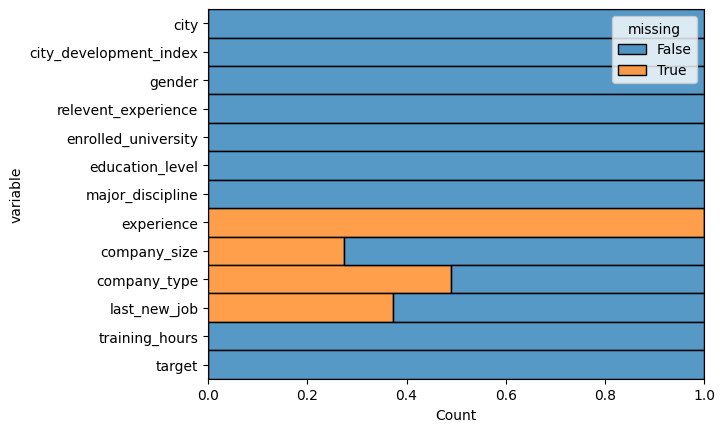

In [110]:
sns.histplot(df[df['experience'].isna()].isna().melt(value_name='missing'),
             y="variable",
             hue="missing",
             multiple="fill")

<Axes: xlabel='Count', ylabel='variable'>

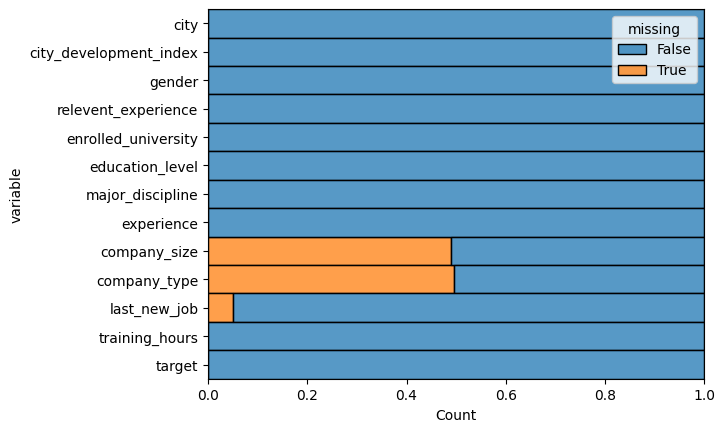

In [111]:
sns.histplot(df[df['experience'] == '<1'].isna().melt(value_name='missing'),
             y="variable",
             hue="missing",
             multiple="fill")

In [112]:
df.dropna(subset='experience', inplace=True)
df['experience'].value_counts(dropna=False, normalize=True)

experience
>20    0.179843
5      0.074601
4      0.070746
3      0.067441
6      0.062334
7      0.054974
2      0.053823
10     0.052371
9      0.052170
8      0.042257
11     0.036700
15     0.036349
14     0.031392
16     0.028338
12     0.026586
1      0.025534
<1     0.024733
13     0.022080
17     0.018475
19     0.016222
18     0.014920
20     0.008111
Name: proportion, dtype: float64

In [115]:
df['experience'].replace('>20', 21, inplace=True)
df['experience'].replace('<1', 0, inplace=True)
df['experience'] = df['experience'].astype(int)

0        21
1        15
2         5
4        21
5        11
         ..
21282    16
21283    18
21284     3
21285     7
21286    15
Name: experience, Length: 19973, dtype: int32

In [120]:
df['experience'] = pd.cut(df['experience'],
                          bins=[0, 2, 5, 10, 15, 20, 100],
                          labels=[0, 1, 2, 3, 4, 5],
                          include_lowest=True)

In [122]:
df['experience'].value_counts(dropna=False, normalize=True)

experience
2    0.264107
1    0.212787
5    0.179843
3    0.153107
0    0.104091
4    0.086066
Name: proportion, dtype: float64

**company_size & company_type**

In [130]:
df['company_size'].value_counts(dropna=False, normalize=True)

company_size
NaN          0.287889
50-99        0.164873
100-500      0.140440
10000+       0.109247
10/49        0.078756
1000-4999    0.071446
<10          0.069744
500-999      0.046963
5000-9999    0.030641
Name: proportion, dtype: float64

In [137]:
df_temp = df.copy()
df_temp['company_size'].fillna('Mising size', inplace=True)
df_temp['company_type'].fillna('Mising type', inplace=True)

<Axes: xlabel='company_size', ylabel='percent'>

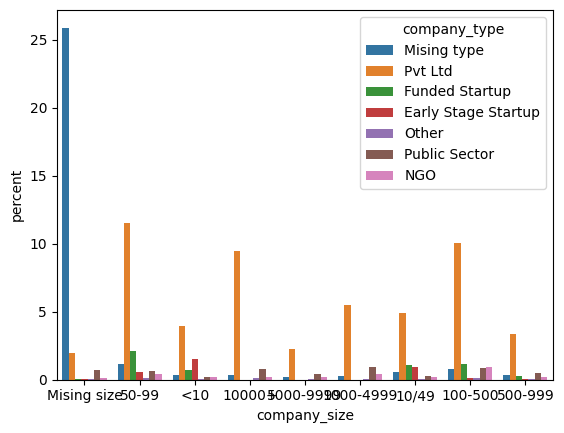

In [138]:
sns.countplot(x='company_size',
              data=df_temp,
              stat='percent',
              hue='company_type')

<Axes: xlabel='company_type', ylabel='percent'>

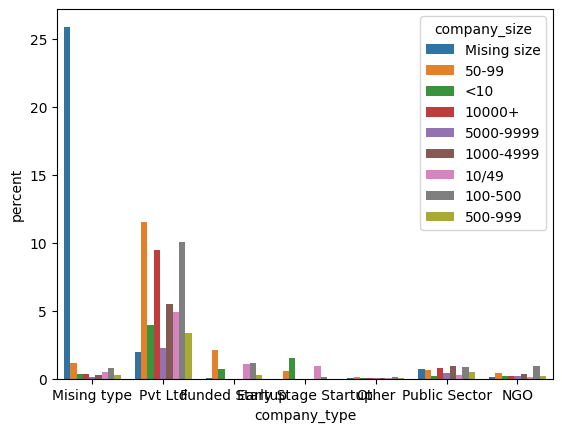

In [139]:
sns.countplot(x='company_type',
              data=df_temp,
              stat='percent',
              hue='company_size')

In [143]:
df[(df['company_size'].isna())
   & (df['company_type'].isna())].isna().sum(axis=0)

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5169
company_type              5169
last_new_job               117
training_hours               0
target                       0
dtype: int64

In [164]:
df['company_size'] = df_raw['company_size']
df['company_type'] = df_raw['company_type']

In [165]:
# df.loc[(df['company_size'].isna()) & (df['company_type'].isna()),
#        'company_size'] = df.loc[(df['company_size'].isna()) &
#                                 (df['company_type'].isna()),
#                                 'company_size'].fillna('Missing size')
# df.loc[(df['company_size'].isna()) & (df['company_type'].isna()),
#        'company_type'] = df.loc[(df['company_size'].isna()) &
#                                 (df['company_type'].isna()),
#                                 'company_type'].fillna('Missing type')
df['company_size'].fillna('Mising size', inplace=True)
df['company_type'].fillna('Mising type', inplace=True)

In [153]:
df_temp = df.copy()
df_temp['company_size'].fillna('NAN', inplace=True)
df_temp['company_type'].fillna('NAN', inplace=True)

<Axes: xlabel='company_size', ylabel='percent'>

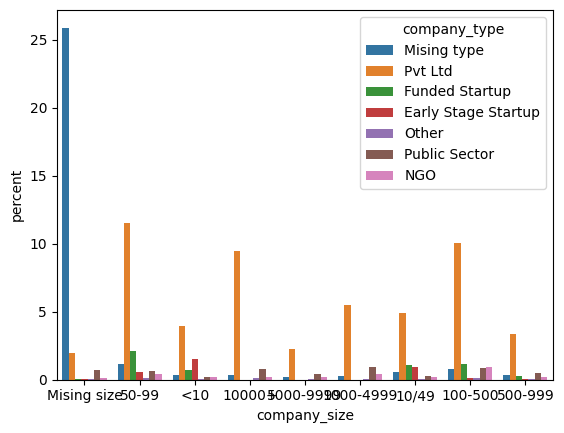

In [167]:
sns.countplot(x='company_size', data=df, stat='percent', hue='company_type')

In [168]:
le = LabelEncoder()
df['company_size'] = le.fit_transform(df['company_size'])
company_size_encoding = dict(zip(le.classes_, le.transform(le.classes_)))
company_size_encoding


{'10/49': 0,
 '100-500': 1,
 '1000-4999': 2,
 '10000+': 3,
 '50-99': 4,
 '500-999': 5,
 '5000-9999': 6,
 '<10': 7,
 'Mising size': 8}

In [169]:
le = LabelEncoder()
df['company_type'] = le.fit_transform(df['company_type'])
company_type_encoding = dict(zip(le.classes_, le.transform(le.classes_)))
company_type_encoding

{'Early Stage Startup': 0,
 'Funded Startup': 1,
 'Mising type': 2,
 'NGO': 3,
 'Other': 4,
 'Public Sector': 5,
 'Pvt Ltd': 6}

**last_new_job**

In [171]:
df['last_new_job'].value_counts(dropna=False, normalize=True)

last_new_job
1        0.426726
>4       0.177940
2        0.156061
never    0.110950
3        0.056226
4        0.056076
NaN      0.016022
Name: proportion, dtype: float64

C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\359367115.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\359367115.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\359367115.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name,
C:\Users\Junxiao\AppData\Local\Temp\ipykernel_20276\359367115.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

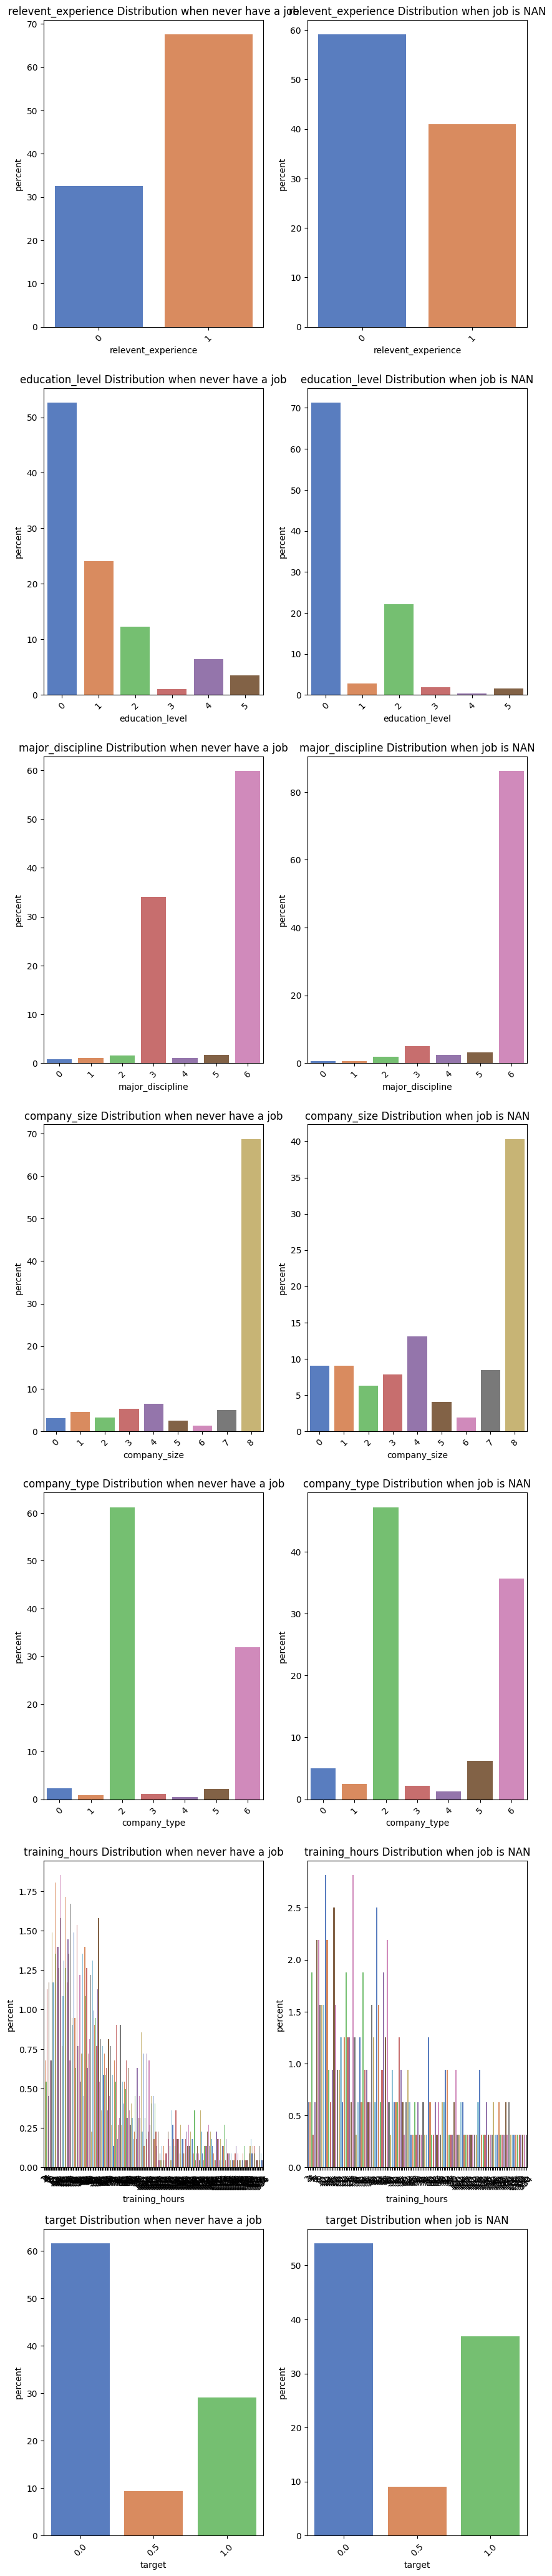

In [172]:
df_temp = df.copy()
df_temp['last_new_job'].fillna('NAN', inplace=True)
plt.figure(figsize=(10, 60))
columns = [
    'relevent_experience', 'education_level', 'major_discipline',
    'company_size', 'company_type', 'training_hours', 'target'
]

for n, col_name in enumerate(columns):
    plt.subplot(8, 2, 2 * n + 1)
    sns.countplot(x=col_name,
                  data=df_temp[df_temp['last_new_job'] == 'never'],
                  stat='percent',
                  palette='muted')
    plt.title(f"{col_name} Distribution when never have a job")
    plt.xticks(rotation=45)

    plt.subplot(8, 2, 2 * n + 2)
    sns.countplot(x=col_name,
                  data=df_temp[df_temp['last_new_job'] == 'NAN'],
                  stat='percent',
                  palette='muted')
    plt.title(f"{col_name} Distribution when job is NAN")
    plt.xticks(rotation=45)

plt.show()

In [175]:
df.dropna(subset='last_new_job', inplace=True)
df['last_new_job'].value_counts(dropna=False, normalize=True)

last_new_job
1        0.433674
>4       0.180838
2        0.158602
never    0.112756
3        0.057141
4        0.056989
Name: proportion, dtype: float64

In [176]:
le = LabelEncoder()
df['last_new_job'] = le.fit_transform(df['last_new_job'])
last_new_job_encoding = dict(zip(le.classes_, le.transform(le.classes_)))
last_new_job_encoding

{'1': 0, '2': 1, '3': 2, '4': 3, '>4': 4, 'never': 5}

**training_hours**

In [177]:
df['training_hours'].value_counts(dropna=False, normalize=True)

training_hours
28     0.016842
18     0.015417
12     0.015163
50     0.014552
22     0.014502
         ...   
302    0.000305
294    0.000254
234    0.000254
286    0.000254
238    0.000204
Name: proportion, Length: 241, dtype: float64

<Axes: >

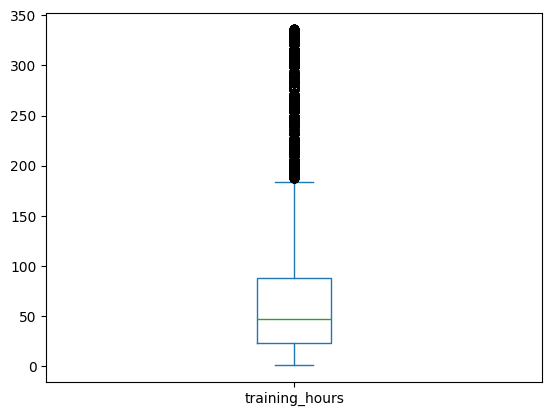

In [179]:
df['training_hours'].plot(kind='box')

In [180]:
df['training_hours'].describe()

count    19653.000000
mean        65.408385
std         60.157136
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [181]:
df['training_hours'] = (df['training_hours'] - np.mean(
    df['training_hours'])) / np.std(df['training_hours'])
df['training_hours'].describe()

count    1.965300e+04
mean    -4.971232e-17
std      1.000025e+00
min     -1.070696e+00
25%     -7.049781e-01
50%     -3.060128e-01
75%      3.755529e-01
max      4.498194e+00
Name: training_hours, dtype: float64

In [182]:
df['training_hours'].isna().sum()

0

**target**

In [183]:
df['target'].value_counts(dropna=False, normalize=True)

target
0.0    0.678828
1.0    0.220526
0.5    0.100646
Name: proportion, dtype: float64

In [184]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
target_encoding = dict(zip(le.classes_, le.transform(le.classes_)))
target_encoding

{0.0: 0, 0.5: 1, 1.0: 2}

### **Correlation**

In [ ]:
# check correlation using heatmap

<Axes: >

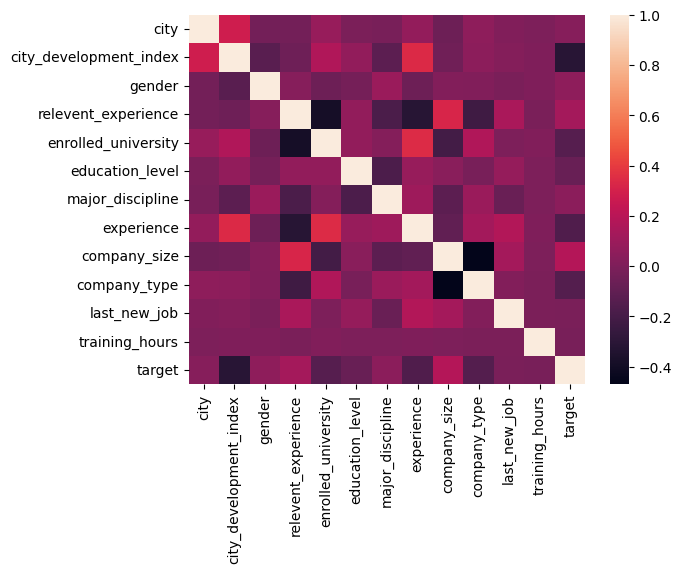

In [186]:
sns.heatmap(df.corr())

In [49]:
df.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [187]:
df.dtypes

city                         int64
city_development_index     float64
gender                       int32
relevent_experience          int32
enrolled_university          int32
education_level              int32
major_discipline             int32
experience                category
company_size                 int32
company_type                 int32
last_new_job                 int32
training_hours             float64
target                       int64
dtype: object

In [188]:
df.to_csv('./archive/preprocessed.csv', index=False, encoding='utf-8')